In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
import re

base_url = 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/'
gameweeks = [
{'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw1.csv', 
    'datetime': '2019-08-10'}, 
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw2.csv', 
    'datetime': '2019-08-17'}, 
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw3.csv', 
    'datetime': '2019-08-24'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw4.csv', 
    'datetime': '2019-09-14'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw5.csv', 
    'datetime': '2019-09-21'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw6.csv', 
    'datetime': '2019-09-28'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw7.csv', 
    'datetime': '2019-10-05'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw8.csv', 
    'datetime': '2019-10-19'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw9.csv', 
    'datetime': '2019-10-26'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw10.csv', 
    'datetime': '2019-11-02'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw11.csv', 
    'datetime': '2019-11-09'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw12.csv', 
    'datetime': '2019-11-23'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw13.csv', 
    'datetime': '2019-11-30'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw14.csv', 
    'datetime': '2019-12-04'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw15.csv', 
    'datetime': '2019-12-07'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw16.csv', 
    'datetime': '2019-12-14'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw17.csv', 
    'datetime': '2019-12-21'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw18.csv', 
    'datetime': '2019-12-26'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw19.csv', 
    'datetime': '2019-12-28'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw20.csv', 
    'datetime': '2019-08-10'}, 
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw21.csv', 
    'datetime': '2019-08-17'}, 
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw22.csv', 
    'datetime': '2019-08-24'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw23.csv', 
    'datetime': '2019-09-14'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw24.csv', 
    'datetime': '2019-09-21'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw25.csv', 
    'datetime': '2019-09-28'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw26.csv', 
    'datetime': '2019-10-05'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw27.csv', 
    'datetime': '2019-10-19'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw28.csv', 
    'datetime': '2019-10-26'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw29.csv', 
    'datetime': '2019-11-02'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw30.csv', 
    'datetime': '2019-11-09'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw31.csv', 
    'datetime': '2019-11-23'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw32.csv', 
    'datetime': '2019-11-30'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw33.csv', 
    'datetime': '2019-12-04'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw34.csv', 
    'datetime': '2019-12-07'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw35.csv', 
    'datetime': '2019-12-14'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw36.csv', 
    'datetime': '2019-12-21'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw37.csv', 
    'datetime': '2019-12-26'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2018-19/gws/gw38.csv', 
    'datetime': '2019-12-28'},
    
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw1.csv', 'datetime': '2019-08-10'}, 
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw2.csv', 'datetime': '2019-08-17'}, 
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw3.csv', 'datetime': '2019-08-24'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw4.csv', 'datetime': '2019-09-14'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw5.csv', 'datetime': '2019-09-21'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw6.csv', 'datetime': '2019-09-28'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw7.csv', 'datetime': '2019-10-05'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw8.csv', 'datetime': '2019-10-19'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw9.csv', 'datetime': '2019-10-26'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw10.csv', 'datetime': '2019-11-02'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw11.csv', 'datetime': '2019-11-09'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw12.csv', 'datetime': '2019-11-23'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw13.csv', 'datetime': '2019-11-30'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw14.csv', 'datetime': '2019-12-04'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw15.csv', 'datetime': '2019-12-07'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw16.csv', 'datetime': '2019-12-14'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw17.csv', 'datetime': '2019-12-21'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw18.csv', 'datetime': '2019-12-26'},
    {'name': 'https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/master/data/2019-20/gws/gw19.csv', 'datetime': '2019-12-28'},
]

def read_csv_gameweeks(gameweek):
    df = pd.read_csv(base_url + gameweek['name'], usecols=["name", "total_points", "kickoff_time"], encoding='latin1')
    df['ds'] = pd.to_datetime(df['kickoff_time']).dt.tz_localize(None)
    df.loc[df['total_points'] == 0] = None
    df['name'] = df['name'].replace('\d+', '', regex=True)
    return df

gameweek_dfs = list(map(
    read_csv_gameweeks, 
    gameweeks
))

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


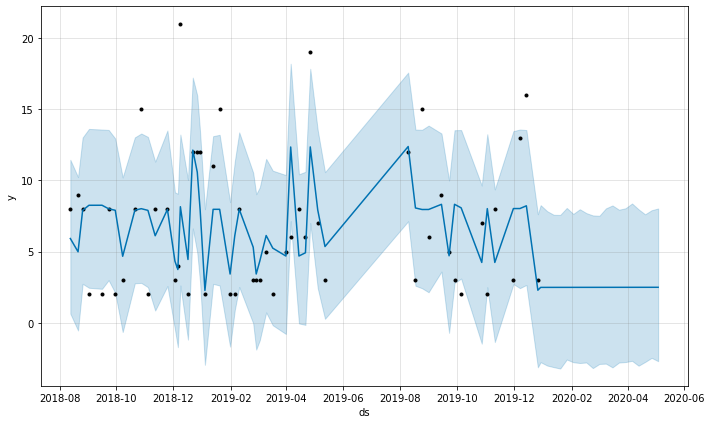

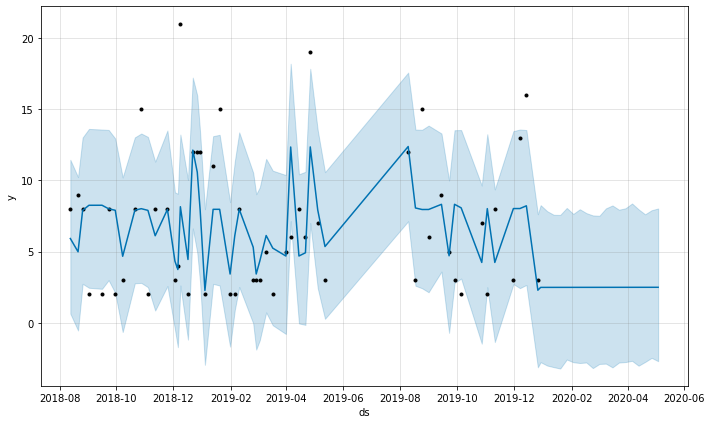

In [150]:
def create_wan_bissaka_gws(gameweek):
    return gameweek[gameweek['name'] == 'Mohamed_Salah_']

wan_bissaka_gws = map(create_wan_bissaka_gws, gameweek_dfs)

gameweeks_wan_bissaka = pd.concat(wan_bissaka_gws)

gameweeks_wan_bissaka = gameweeks_wan_bissaka.rename(columns={'total_points': 'y'}).drop(columns=['name'])
#gameweeks_wan_bissaka

m = Prophet(seasonality_mode='multiplicative', changepoint_prior_scale=0.3).fit(gameweeks_wan_bissaka)
future = m.make_future_dataframe(periods=38 - 19, freq='W')

fcst = m.predict(future)
m.plot(fcst)

In [45]:
import statsmodels.formula.api as sm

gameweeks = pd.concat(gameweek_dfs).sort_values(by=['name', 'kickoff_time'])
#gameweeks

gameweeks = gameweeks.set_index(['name', 'kickoff_time'])

expected_points = gameweeks['total_points'].mean(level=['name']) * 38

expected_points.name = 'expected_points'

total_points = gameweeks['total_points'].sum(level='name')

totals = pd.concat([expected_points, total_points], axis=1)

result = sm.ols(formula="total_points ~ expected_points", data=totals).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           total_points   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     687.0
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          3.36e-105
Time:                        22:47:36   Log-Likelihood:                -3561.1
No. Observations:                 682   AIC:                             7126.
Df Residuals:                     680   BIC:                             7135.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -33.8936      4.239     

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 1.


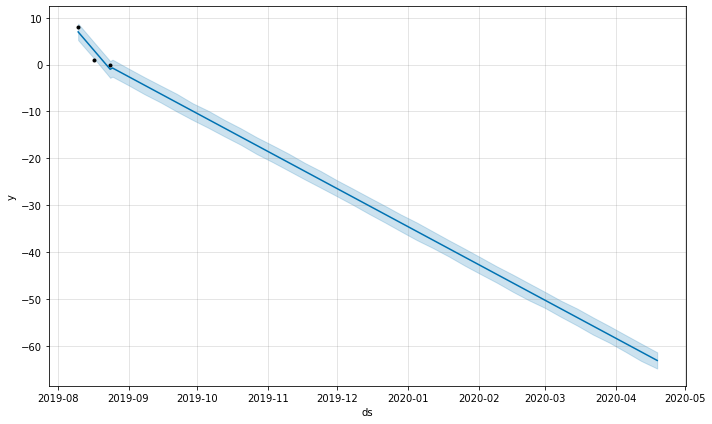

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

gw1 = pd.read_csv("gw1.csv", usecols=["name", "total_points"])
gw2 = pd.read_csv("gw2.csv", usecols=["name", "total_points"])
gw3 = pd.read_csv("gw3.csv", usecols=["name", "total_points"])

gw1["ds"] = pd.to_datetime('2019-08-10')
gw2["ds"] = pd.to_datetime('2019-08-17')
gw3["ds"] = pd.to_datetime('2019-08-24')

# gameweeks = pd.concat([gw1, gw2, gw3]).sort_values(by=['name', 'ds'])
# gameweeks.set_index(['ds', 'name']).unstack()['total_points']

wan_bissaka = gw1['name'] == 'Aaron_Wan-Bissaka_122'
wan_bissaka2 = gw2['name'] == 'Aaron_Wan-Bissaka_122'
wan_bissaka3 = gw3['name'] == 'Aaron_Wan-Bissaka_122'

gameweeks_wan_bissaka = pd.concat([gw1[wan_bissaka], gw2[wan_bissaka2], gw3[wan_bissaka3]]).sort_values(by=['name', 'ds'])
# gameweeks_wan_bissaka.set_index(['ds']).unstack()['total_points']
# gameweeks_wan_bissaka.columns
gameweeks_wan_bissaka = gameweeks_wan_bissaka.rename(columns={'total_points': 'y'}).drop(columns=['name'])

m = Prophet(seasonality_mode='multiplicative', weekly_seasonality=True).fit(gameweeks_wan_bissaka)
future = m.make_future_dataframe(periods=35, freq='W')
fcst = m.predict(future)
fig = m.plot(fcst)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

gw1 = pd.read_csv("gw1.csv", usecols=["name", "total_points"])
gw2 = pd.read_csv("gw2.csv", usecols=["name", "total_points"])
gw3 = pd.read_csv("gw3.csv", usecols=["name", "total_points"])

gw1["gameweek"] = 1
gw2["gameweek"] = 2
gw3["gameweek"] = 3

# gws = [gw1, gw2, gw3]
# gws = [df.set_index(['name', 'gameweek']) for df in gws]
# gameweeks = pd.concat(gws, axis=1)
# #gameweeks.fillna(0, inplace=True)
#gameweeks

gameweeks = pd.concat([gw1, gw2, gw3]).sort_values(by=['name', 'gameweek'])
#gameweeks

gameweeks.set_index(['name', 'gameweek'])

total_points
name                   gameweek              
Aaron_Cresswell_376    1                    0
                       2                    0
                       3                    0
Aaron_Lennon_430       1                    1
                       2                    1
                       3                    0
Aaron_Mooy_516         1                    0
                       2                    1
                       3                    0
Aaron_Ramsdale_494     1                    2
                       2                    4
                       3                    1
Aaron_Wan-Bissaka_122  1                    8
                       2                    1
                       3                    0
Abdoulaye_Doucouré_368 1                    0
                       2                    2
                       3                    2
Adam_Lallana_195       1                    0
                       2                    0
                       3                    1
Adam_Masina_355        1                    0
                       2                    0
                       3                    0
Adam_Smith_63          1                    1
                       2                    2
                       3                    1
Adam_Webster_493       1                    0
                       2                    0
                       3                    0
...                                       ...
Willy_Caballero_112    1                    0
                       2                    0
                       3                    0
Winston_Reid_383       1                    0
                       2                    0
                       3                    0
Xherdan_Shaqiri_194    1                    0
                       2                    0
                       3                    0
Yan_Valery_306         1                    1
                       2                    1
                       3                    1
Yerry_Mina_142         1                    9
                       2                    7
                       3                    1
Yoshinori_Muto_260     1                    0
                       2                    1
                       3                    1
Youri_Tielemans_448    1                    3
                       2                    2
                       3                    2
Yves_Bissouma_53       1                    0
                       2                    0
                       3                    0
Çaglar_Söyüncü_164     1                    6
                       2                    2
                       3                    5
Ørjan_Nyland_27        1                    0
                       2                    0
                       3                    0

[1584 rows x 1 columns]

In [49]:
from linearmodels.panel import PanelOLS
from linearmodels.datasets import wage_panel
import statsmodels.api as sm
data = wage_panel.load()
data = data.set_index(['nr','year'])

data
# dependent = data.lwage
# exog = sm.add_constant(data[['expersq','married','union']])
# mod = PanelOLS(dependent, exog, entity_effects=True)
# res = mod.fit(cov_type='unadjusted')
# res

black  exper  hisp  hours  married  educ  union     lwage  \
nr    year                                                              
13    1980      0      1     0   2672        0    14      0  1.197540   
      1981      0      2     0   2320        0    14      1  1.853060   
      1982      0      3     0   2940        0    14      0  1.344462   
      1983      0      4     0   2960        0    14      0  1.433213   
      1984      0      5     0   3071        0    14      0  1.568125   
      1985      0      6     0   2864        0    14      0  1.699891   
      1986      0      7     0   2994        0    14      0 -0.720263   
      1987      0      8     0   2640        0    14      0  1.669188   
17    1980      0      4     0   2484        0    13      0  1.675962   
      1981      0      5     0   2804        0    13      0  1.518398   
      1982      0      6     0   2530        0    13      0  1.559191   
      1983      0      7     0   2340        0    13      0  1.725410   
      1984      0      8     0   2486        0    13      0  1.622022   
      1985      0      9     0   2164        0    13      0  1.608588   
      1986      0     10     0   2749        0    13      0  1.572385   
      1987      0     11     0   2476        0    13      0  1.820334   
18    1980      0      4     0   2332        1    12      0  1.515963   
      1981      0      5     0   2116        1    12      0  1.735379   
      1982      0      6     0   2500        1    12      0  1.631744   
      1983      0      7     0   2474        1    12      0  1.998229   
      1984      0      8     0   2362        1    12      0  2.184014   
      1985      0      9     0   2340        1    12      0  2.266662   
      1986      0     10     0   2340        1    12      0  2.069944   
      1987      0     11     0   2340        1    12      0  2.873161   
45    1980      0      2     0   1864        0    12      1  1.894115   
      1981      0      3     0   2021        0    12      1  1.471159   
      1982      0      4     0   2274        0    12      0  1.473498   
      1983      0      5     0   2112        0    12      0  1.740914   
      1984      0      6     0   1920        0    12      0  1.823214   
      1985      0      7     0   2205        0    12      0  1.908273   
...           ...    ...   ...    ...      ...   ...    ...       ...   
12477 1982      0      6     0   2080        1    12      1  2.201329   
      1983      0      7     0   2080        1    12      1  2.171697   
      1984      0      8     0   2080        1    12      1  2.168054   
      1985      0      9     0   2080        1    12      1  2.133687   
      1986      0     10     0   2080        1    12      1  2.113619   
      1987      0     11     0   1760        1    12      1  2.202487   
12500 1980      0      4     0   2008        1    12      0  0.972403   
      1981      0      5     0   3190        0    12      0  1.324886   
      1982      0      6     0   2584        0    12      0  0.962707   
      1983      0      7     0   2351        1    12      0  0.845251   
      1984      0      8     0   2234        1    12      0  1.929574   
      1985      0      9     0   2290        1    12      0  2.037503   
      1986      0     10     0   3151        1    12      0  1.148221   
      1987      0     11     0   3276        1    12      0  1.306740   
12534 1980      0      2     0   2080        0    11      0  1.840042   
      1981      0      3     0   2000        0    11      0  2.174752   
      1982      0      4     0   1800        1    11      0  2.122767   
      1983      0      5     0   2080        1    11      0  2.130875   
      1984      0      6     0   2080        1    11      0  2.168054   
      1985      0      7     0   2080        1    11      0  2.207794   
      1986      0      8     0   2080        1    11      0  2.381883   
      1987      0      9     0   2080        1    11      0  2.342917 